In [1]:
import random

def generate_random_window(size: int, max_value: int) -> tuple[int, int]:
    """
    Generate a random window (start, end) of given size within the range [0, max_value).

    Args:
        size (int): Size of the window.
        max_value (int): Maximum value (exclusive) for indices.

    Returns:
        tuple[int, int]: (start, end) indices of the window.
    """
    assert size > 0, f'size ({size}) must be positive'
    assert size <= max_value, f'size ({size}) must be <= max_value ({max_value})'
    start: int = random.randint(0, max_value - size)
    end: int = start + size
    return start, end

Found 8 zarr files:
- s1a-s2-raw-s-vh-20160727t060627-20160727t060648-012330-01331f_burst_0.zarr
- s1a-s1-raw-s-vv-20160825t111231-20160825t111302-012756-01415f_burst_1.zarr
- s1a-s1-raw-s-vv-20150323t070414-20150323t070447-005155-0067fc_burst_0.zarr
- s1a-s1-raw-s-vh-20150405t064819-20150405t064839-005345-006c77_burst_0.zarr
- s1a-s1-raw-s-vh-20141214t162845-20141214t162910-003717-0046b3_burst_0.zarr
- s1a-s2-raw-s-vv-20160517t093624-20160517t093645-011297-0111e4_burst_0.zarr
- s1a-s4-raw-s-vh-20150404t165234-20150404t165304-005336-006c36_burst_0.zarr
- s1a-s1-raw-s-vh-20150310t151720-20150310t151753-004971-00638c_burst_0.zarr
Processing file 5/8: s1a-s1-raw-s-vh-20141214t162845-20141214t162910-003717-0046b3_burst_0.zarr
DISPLAYED: s1a-s1-raw-s-vh-20141214t162845-20141214t162910-003717-0046b3_burst_0.zarr with rows: 4000-7000 and cols: 4000-7000


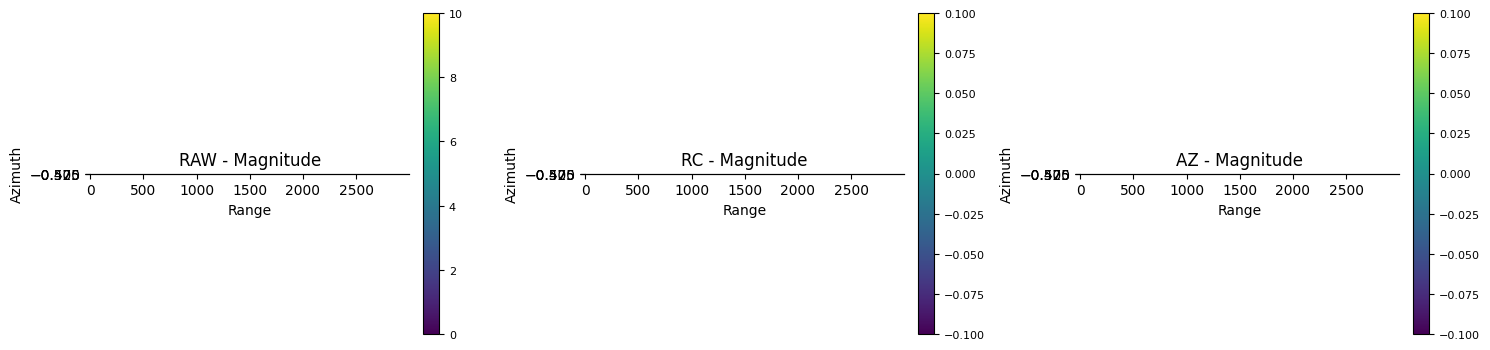

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sarpyx.utils.zarr_utils import ProductHandler
import os

data_dir = "/Data_large/marine/PythonProjects/SAR/sarpyx/focused_data"
zarr_files = [f for f in os.listdir(data_dir) if f.endswith('.zarr')]
print(f"Found {len(zarr_files)} zarr files:")
for zarr_file in zarr_files:
    print(f"- {zarr_file}")

for idx, zarr_file in enumerate(zarr_files):
    
    if idx not in [4]:
        continue
    else:
        print(f"Processing file {idx+1}/{len(zarr_files)}: {zarr_file}")
        filepath = os.path.join('/Data_large/marine/PythonProjects/SAR/sarpyx/focused_data', zarr_file)
        pHandler = ProductHandler(filepath)
        shapes = pHandler.array_shapes
        
        H, W  = pHandler.array_shapes['raw']

        row_start, row_end = 4000, 7000
        col_start, col_end = 4000, 7000

        print(f"DISPLAYED: {zarr_file} with rows: {row_start}-{row_end} and cols: {col_start}-{col_end}")

        pHandler.visualize_arrays(
            array_names=['raw','rc','az'], 
            rows=(row_start, row_end), 
            cols=(col_start, col_end),
            plot_type='magnitude',
            vminmax='auto',
        )
        
        

Analyzing: s1a-s1-raw-s-hh-20150519t121717-20150519t121750-005990-007b7d_burst_0.zarr
Array shapes: {'az': (2250, 25672), 'raw': (2250, 25672), 'rc': (2250, 25672), 'rcmc': (2250, 25672)}
Dimensions: Height=2250, Width=25672
Random window: rows 489-1489, cols 21015-24015


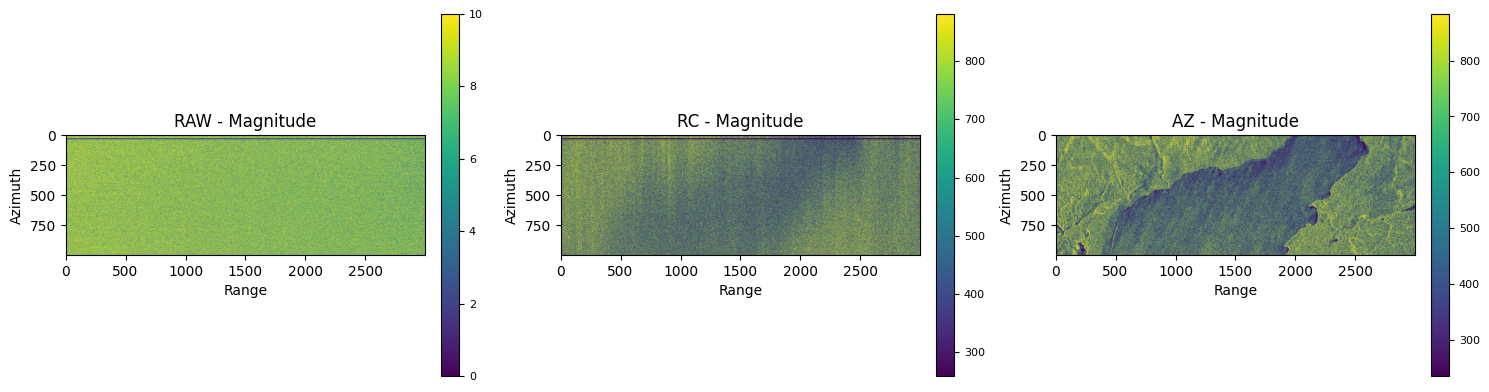

In [11]:
# Analyze a specific zarr file
target_file = 's1a-s1-raw-s-hh-20150519t121717-20150519t121750-005990-007b7d_burst_0.zarr'
target_filepath = os.path.join(data_dir, target_file)

if os.path.exists(target_filepath):
    print(f"Analyzing: {target_file}")
    target_handler = ProductHandler(target_filepath)
    target_shapes = target_handler.array_shapes
    
    print(f"Array shapes: {target_shapes}")
    
    # Get dimensions
    target_H, target_W = target_shapes['raw']
    print(f"Dimensions: Height={target_H}, Width={target_W}")
    
    # Generate random window using the existing function
    window_size = min(1000, target_H)  # Use smaller window if data is small
    row_start_rand, row_end_rand = generate_random_window(window_size, target_H)
    
    window_size = min(3000, target_W)
    col_start_rand, col_end_rand = generate_random_window(window_size, target_W)
    
    print(f"Random window: rows {row_start_rand}-{row_end_rand}, cols {col_start_rand}-{col_end_rand}")
    
    # Visualize the data
    target_handler.visualize_arrays(
        array_names=['raw', 'rc', 'az'], 
        rows=(row_start_rand, row_end_rand), 
        cols=(col_start_rand, col_end_rand),
        plot_type='magnitude',
        vminmax='auto',
    )
else:
    print(f"File not found: {target_file}")
    print("Available files:")
    for f in zarr_files:
        print(f"- {f}")